<a href="https://colab.research.google.com/github/Carvas91/PyTroch/blob/main/DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


In [69]:
import seaborn as sns

iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)

labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [70]:
train_data, test_data, train_labels, test_labels =train_test_split(data,labels,test_size=.2)

#Tensor DF
train_data = TensorDataset(train_data,train_labels)
test_data = TensorDataset(test_data, test_labels)

# #Data loader
train_loader = DataLoader(train_data, batch_size=12)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [71]:
for X,y in enumerate(train_loader):
  print(X,y)

0 [tensor([[6.7000, 3.3000, 5.7000, 2.1000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [5.0000, 3.2000, 1.2000, 0.2000],
        [5.2000, 2.7000, 3.9000, 1.4000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [4.8000, 3.0000, 1.4000, 0.3000]]), tensor([2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0])]
1 [tensor([[5.7000, 2.8000, 4.1000, 1.3000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [6.4000, 2.700

In [72]:
for X,y in train_loader:
  print(X.shape, y.shape)

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


In [73]:
for X,y in test_loader:
  print(X.shape, y.shape)

torch.Size([30, 4]) torch.Size([30])


In [74]:
def createModel():
  ANNIris = nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3)
  )

  lossfun = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(ANNIris.parameters(), lr=0.01)

  return ANNIris, lossfun, optimizer


In [75]:
from ast import AnnAssign
epochs = 100

def trainModel():
  trainAcc = []
  testAcc = []

  for i in range(epochs):
    batchAcc = []

    for X,y in train_loader:
      yHat = ANNIris(X)
      loss = lossfun(yHat,y)

      #Back prop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchAcc.append(torch.mean((torch.argmax(yHat, axis=1)==y).float()).item()*100)

    trainAcc.append(np.mean(batchAcc))

    X,y = next(iter(test_loader))
    preds = torch.argmax(ANNIris(X),axis=1)
    testAcc.append(torch.mean((preds == y).float()).item()*100)

  return trainAcc, testAcc

In [76]:
ANNIris, lossfun, optimizer = createModel()

trainAcc, testAcc = trainModel()

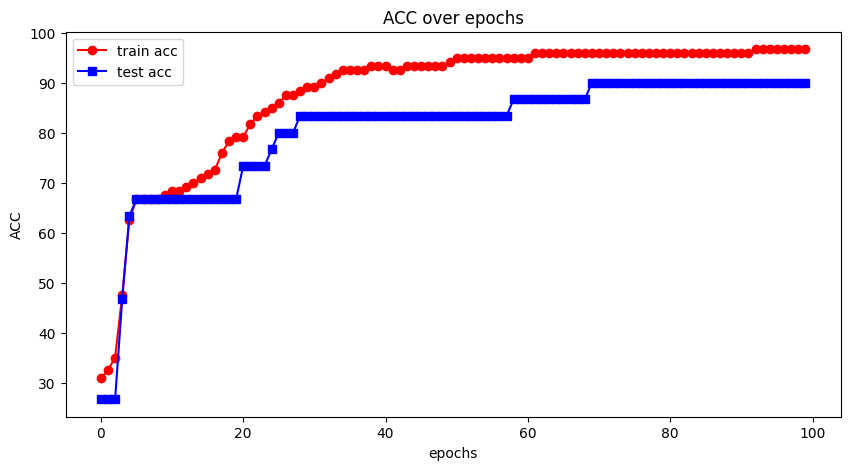

In [77]:
plt.figure(figsize=(10,5))
plt.plot(trainAcc, 'ro-')
plt.plot(testAcc, 'bs-')
plt.xlabel('epochs')
plt.ylabel('ACC')
plt.legend(['train acc','test acc'])
plt.title('ACC over epochs')
plt.show()